# MCMC Analysis

In [1]:
import numpy as np
from gbi_diff.sampling.mcmc import MCMCSampler
from gbi_diff.utils.sampling_mcmc_config import Config
import torch

In [2]:
checkpoint = "results/gbi/two_moons/lightning_logs/version_71/epoch=94-step=3800.ckpt"
config = Config.from_file("config/sampling_mcmc.yaml")
config.observed_data_file = "data/observed_data/two_moons_10.pt"
sampler = MCMCSampler(checkpoint, config)

{'theta_dim': 2, 'simulator_out_dim': 2, 'optimizer_config': _Optimizer(name='Adam', lr=0.0001, weight_decay=0), 'net_config': _Model(ThetaEncoder=_ThetaEncoder(output_dim=128, architecture=[256], activation_func='ReLU', final_activation='ReLU'), SimulatorEncoder=_SimulatorEncoder(output_dim=128, architecture=[256], activation_func='ReLU', final_activation='ReLU'), LatentMLP=_LatentMLP(architecture=[256, 156, 128], activation_func='ReLU', final_activation=None))}


In [8]:
betas = np.array([10, 25, 50, 100, 150, 200, 300, 400, 500])
n_samples = 1000
samples = np.zeros((len(betas), n_samples, sampler.theta_dim))
p = np.zeros((len(betas), n_samples,))
for idx, beta in enumerate(betas):
    # modify beta for other sampling results
    sampler.update_beta(float(beta))
    samples[idx] = sampler.single_forward(sampler._x_o[3], n_samples)
    p[idx] = sampler.potential_function.log_likelihood(torch.from_numpy(samples[idx]).float()).detach().numpy()[:, 0]

Sample: 100%|██████████| 1200/1200 [00:04, 265.08it/s, step size=5.93e-01, acc. prob=0.855]


Text(0.5, 0.98, 'MCMC sampling on GBI-ACE with different betas')

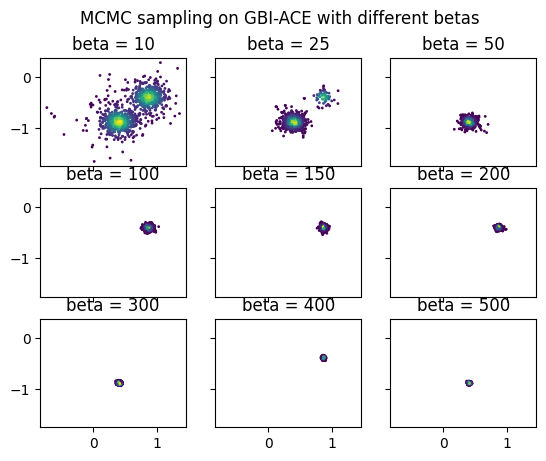

In [11]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(ncols=3, nrows=3, sharex=True, sharey=True)

for idx, ax in enumerate(axs.flatten()):
    ax.set_title(f"beta = {betas[idx]}")
    ax.scatter(*samples[idx].T, s=1, c=np.exp(p[idx]))

fig.suptitle("MCMC sampling on GBI-ACE with different betas")